# Netflix Analysis

dataset link: https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
df = pd.read_csv('./netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### #1 The most popular film, release year 

In [179]:
# check the type column
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [180]:
# film = movie
film = df[df['type'] == 'Movie']
film.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [181]:
# group by release year
film['count'] = 1
release_year1 = film.groupby(['release_year']).sum().reset_index()[['release_year', 'count']]
release_year1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11708\2535237750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film['count'] = 1


,release_year,count
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
...,...,...
68,2017,767
69,2018,767
70,2019,633
71,2020,517


Another way to do it

In [182]:
# using value_counts
film1 = film['release_year'].value_counts()
film1

2017    767
2018    767
2016    658
2019    633
2020    517
       ... 
1966      1
1961      1
1946      1
1963      1
1947      1
Name: release_year, Length: 73, dtype: int64

In [183]:
film_reset = pd.DataFrame(film1)
film_new = film_reset.reset_index()
film_new.columns = ['release_year', 'count']

In [184]:
# sort values
release_year2 = film_new.sort_values(by=['release_year'], ascending=True) 
# ascending True is default

release_year2

,release_year,count
60,1942,2
53,1943,3
55,1944,3
57,1945,3
70,1946,1
...,...,...
0,2017,767
1,2018,767
3,2019,633
4,2020,517


Sort the most films in particular year:

In [185]:
release_year2.sort_values(['count'], ascending=False)

,release_year,count
1,2018,767
0,2017,767
2,2016,658
3,2019,633
4,2020,517
...,...,...
69,1961,1
71,1963,1
68,1966,1
72,1947,1


### #2 The year that Netflix added the most content to its platform

In [186]:
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [187]:
# change the values to date time
df['new_date'] = pd.to_datetime(df['date_added'])

# check the column
df['new_date'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: new_date, dtype: datetime64[ns]

In [188]:
# make a new column. Grab the year from the new_date column
df['date_added_year'] = df['new_date'].dt.year
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0


In [189]:
# group by the year and count
year_added = df['date_added_year'].value_counts().reset_index()
year_added.columns = ['date_added_year', 'count']
year_added

,date_added_year,count
0,2019.0,2016
1,2020.0,1879
2,2018.0,1649
3,2021.0,1498
4,2017.0,1188
5,2016.0,429
6,2015.0,82
7,2014.0,24
8,2011.0,13
9,2013.0,11


In [190]:
# change the data type
year_added['date_added_year'] = year_added['date_added_year'].astype('int64')

year_added

,date_added_year,count
0,2019,2016
1,2020,1879
2,2018,1649
3,2021,1498
4,2017,1188
5,2016,429
6,2015,82
7,2014,24
8,2011,13
9,2013,11


In [191]:
year_added_period = year_added.sort_values(by='date_added_year')
year_added_period.head(5)

,date_added_year,count
12,2008,2
11,2009,2
13,2010,1
8,2011,13
10,2012,3


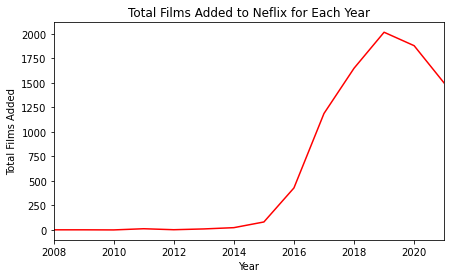

In [192]:
# Plotting
# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 4))

# plot data
ax.plot(year_added_period['date_added_year'], year_added_period['count'], c='red');

# customise
ax.set(title='Total Films Added to Neflix for Each Year',
       ylabel='Total Films Added',
       xlabel='Year')

# remove the x margin
ax.margins(x=0)

### #3 The most popular month to add new content

In [193]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0


In [194]:
# create month column
df['date_added_month'] = df['new_date'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   object        
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  new_date          8797 non-null   datetime64[ns]
 13  date_added_year   8797 non-null   float64       
 14  date_added_month  8797 n

In [195]:
# group by the month and count
month_added = df['date_added_month'].value_counts().reset_index()
month_added.columns = ['date_added_month', 'count']
month_added

,date_added_month,count
0,7.0,827
1,12.0,813
2,9.0,770
3,4.0,764
4,10.0,760
5,8.0,755
6,3.0,742
7,1.0,738
8,6.0,728
9,11.0,705


In [196]:
# change the data type
month_added.date_added_month = month_added.date_added_month.astype('int64')
month_added

,date_added_month,count
0,7,827
1,12,813
2,9,770
3,4,764
4,10,760
5,8,755
6,3,742
7,1,738
8,6,728
9,11,705


In [197]:
month_added_period = month_added.sort_values(by='date_added_month')
month_added_period

,date_added_month,count
7,1,738
11,2,563
6,3,742
3,4,764
10,5,632
8,6,728
0,7,827
5,8,755
2,9,770
4,10,760


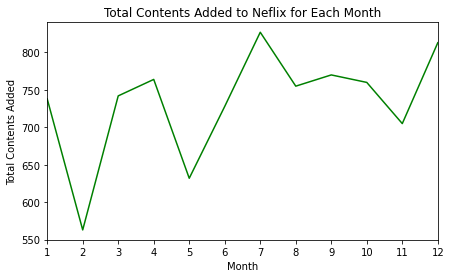

In [198]:
# Plotting
# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 4))

# plot data
ax.plot(month_added_period['date_added_month'], month_added_period['count'], c='green');

# customise
ax.set(title='Total Contents Added to Neflix for Each Month',
       ylabel='Total Contents Added',
       xlabel='Month')

# show all the x coordinate
plt.xticks(month_added_period['date_added_month'])

# remove the x margin
ax.margins(x=0)

### #4 The longest title of film within the dataset

In [199]:
film.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,1


In [200]:
# assign a new datafrane to work with
hey = film
hey.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1


In [201]:
# count the title length and assign it to a new column
hey['title_length'] = hey['title'].str.len()
hey.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11708\1624999324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hey['title_length'] = hey['title'].str.len()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,title_length
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,20
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,32
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1,7
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1,12
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,1,12


Another way to count a string lenght is by using list comprehension with for loop

In [202]:
hey1 = film
hey1['title_length'] = [len(title) for title in film['title']]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11708\3701706759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hey1['title_length'] = [len(title) for title in film['title']]


In [203]:
# check
hey1.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,title_length
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,20


We can use either hey and hey1

In [204]:
# grab the longest title by sorting
top5_title_length = hey1.sort_values(['title_length'], ascending=False).head(5)
top5_title_length

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,title_length
5164,s5165,Movie,Jim & Andy: The Great Beyond - Featuring a Ver...,Chris Smith,Jim Carrey,"Canada, United States","November 17, 2017",2017,TV-MA,94 min,Documentaries,Through the lens of his stunningly immersive p...,1,104
8462,s8463,Movie,The Power of Grayskull: The Definitive History...,"Randall Lobb, Robert McCallum",NaN,"Canada, United States","August 24, 2018",2017,TV-14,96 min,Documentaries,This colorful documentary explores the origins...,1,88
3240,s3241,Movie,Mike Birbiglia: What I Should Have Said Was No...,NaN,Mike Birbiglia,United States,"November 22, 2019",2008,TV-MA,56 min,Stand-Up Comedy,Mike Birbiglia performs in this live concert s...,1,88
4851,s4852,Movie,Steve Martin and Martin Short: An Evening You ...,Marcus Raboy,"Steve Martin, Martin Short",United States,"May 25, 2018",2018,TV-14,74 min,Stand-Up Comedy,Longtime pals and showbiz icons Steve Martin a...,1,83
3479,s3480,Movie,Cultivating the Seas: History and Future of th...,Mana Yasuda,NaN,NaN,"September 28, 2019",2019,TV-PG,45 min,"Documentaries, International Movies",An in-depth look at the full-cycle breeding pr...,1,79


In [205]:
# grab only the title and the title length
top5_title_length[['title', 'title_length']]

,title,title_length
5164,Jim & Andy: The Great Beyond - Featuring a Ver...,104
8462,The Power of Grayskull: The Definitive History...,88
3240,Mike Birbiglia: What I Should Have Said Was No...,88
4851,Steve Martin and Martin Short: An Evening You ...,83
3479,Cultivating the Seas: History and Future of th...,79


In [206]:
# Grab the longest title using max
hey.title_length.max()

# get the row
longest_film_title = hey[hey['title_length'] == 104]

# get the title and title length
longest_film_title[['title', 'title_length']]

,title,title_length
5164,Jim & Andy: The Great Beyond - Featuring a Ver...,104


In [207]:
# or we can use iloc indexing
top5_title_length.iloc[0][['title', 'title_length']]

title           Jim & Andy: The Great Beyond - Featuring a Ver...
title_length                                                  104
Name: 5164, dtype: object

In [208]:
# or we can just grab the title
top5_title_length.iloc[0]['title']

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'